# NFL Field Goal Kicking

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load and Inspect the Data

In [2]:
data_url = "http://users.stat.ufl.edu/~winner/data/nfl2008_fga.csv"
local_file = "C:/datasets/NFL/nfl2008_fga.csv"

In [3]:
df = pd.read_csv(local_file)

In [4]:
df.head()

,GameDate,AwayTeam,HomeTeam,qtr,min,sec,kickteam,def,down,togo,...,distance,homekick,kickdiff,timerem,offscore,defscore,season,GOOD,Missed,Blocked
0,20081130,IND,CLE,1,47,2,IND,CLE,4.0,11.0,...,30,0,-3,2822,0,3,2008,1,0,0
1,20081005,IND,HOU,1,54,47,IND,HOU,4.0,3.0,...,46,0,0,3287,0,0,2008,1,0,0
2,20081228,TEN,IND,1,45,20,IND,TEN,4.0,3.0,...,28,1,7,2720,7,0,2008,1,0,0
3,20081012,BAL,IND,1,45,42,IND,BAL,4.0,1.0,...,37,1,14,2742,14,0,2008,1,0,0
4,20080907,CHI,IND,1,50,56,IND,CHI,4.0,21.0,...,39,1,0,3056,0,0,2008,1,0,0


## Data Cleaning and Wrangling

In [5]:
df['timeremhalf'] = df.timerem %(60 * 30)
df['overtime'] = df.qtr == 5
df['twominutewarning'] = ((df.qtr == 4)|(df.qtr == 2))&(df.timeremhalf <= 120)
df['fourth_qtr'] = df.qtr == 4

In [6]:
df.describe()

,GameDate,qtr,min,sec,down,togo,kicker,ydline,distance,homekick,kickdiff,timerem,offscore,defscore,season,GOOD,Missed,Blocked,timeremhalf
count,1.039000e+03,1039.000000,1039.000000,1039.000000,1037.000000,1037.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.0,1039.000000,1039.000000,1039.000000,1039.000000
mean,2.008140e+07,2.497594,27.968239,26.551492,3.818708,6.738669,19.537055,18.768046,36.666025,0.494706,0.382098,1704.645813,9.949952,9.567854,2008.0,0.866218,0.133782,0.021174,706.763234
std,1.702338e+03,1.108621,16.716783,18.107977,0.635134,4.155772,11.303244,10.187505,9.847836,0.500213,9.675133,1003.771275,9.434869,8.365389,0.0,0.340582,0.340582,0.144034,524.990531
min,2.008090e+07,1.000000,-15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,18.000000,0.000000,-41.000000,-887.000000,0.000000,0.000000,2008.0,0.000000,0.000000,0.000000,1.000000
25%,2.008100e+07,2.000000,14.000000,9.500000,4.000000,4.000000,9.000000,10.000000,28.000000,0.000000,-6.000000,895.500000,0.000000,3.000000,2008.0,1.000000,0.000000,0.000000,188.500000
50%,2.008111e+07,2.000000,30.000000,25.000000,4.000000,6.000000,20.000000,19.000000,37.000000,0.000000,0.000000,1808.000000,7.000000,7.000000,2008.0,1.000000,0.000000,0.000000,699.000000
75%,2.008120e+07,4.000000,42.000000,43.000000,4.000000,9.000000,30.000000,26.000000,44.000000,1.000000,6.000000,2556.500000,16.000000,14.000000,2008.0,1.000000,0.000000,0.000000,1150.000000
max,2.009020e+07,5.000000,58.000000,59.000000,4.000000,25.000000,37.000000,86.000000,76.000000,1.000000,44.000000,3507.000000,48.000000,44.000000,2008.0,1.000000,1.000000,1.000000,1737.000000


In [7]:
df = df.drop(columns='season')

In [8]:
df.GameDate = df.GameDate.astype(int)
df['year'] = df.GameDate // 10000
df['month'] = (df.GameDate % 10000) // 100
df['day'] = df.GameDate % 100
df.GameDate = pd.to_datetime(df[['month','day','year']])
df['close_score'] = df.kickdiff.abs() <= 8
df['score_can_change'] = (df.kickdiff >= -3) & (df.kickdiff <= 0)

In [9]:
print(df.loc[df.GOOD + df.Missed + df.Blocked != 1,'GOOD':'Blocked'].describe())

       GOOD  Missed  Blocked
count  22.0    22.0     22.0
mean    1.0     0.0      1.0
std     0.0     0.0      0.0
min     1.0     0.0      1.0
25%     1.0     0.0      1.0
50%     1.0     0.0      1.0
75%     1.0     0.0      1.0
max     1.0     0.0      1.0


In [10]:
df[['GOOD','Blocked','Missed']].assign(count = 1).groupby(by=['GOOD','Blocked','Missed']).count().reset_index()

,GOOD,Blocked,Missed,count
0,0,0,1,139
1,1,0,0,878
2,1,1,0,22


In [11]:
df.GOOD -= df.Blocked

In [12]:
df[['GOOD','Blocked','Missed']].assign(count = 1).groupby(by=['GOOD','Blocked','Missed']).count().reset_index()

,GOOD,Blocked,Missed,count
0,0,0,1,139
1,0,1,0,22
2,1,0,0,878


In [13]:
df['result'] = df.Blocked * 2 + df.Missed
df.result = df.result.astype(int)

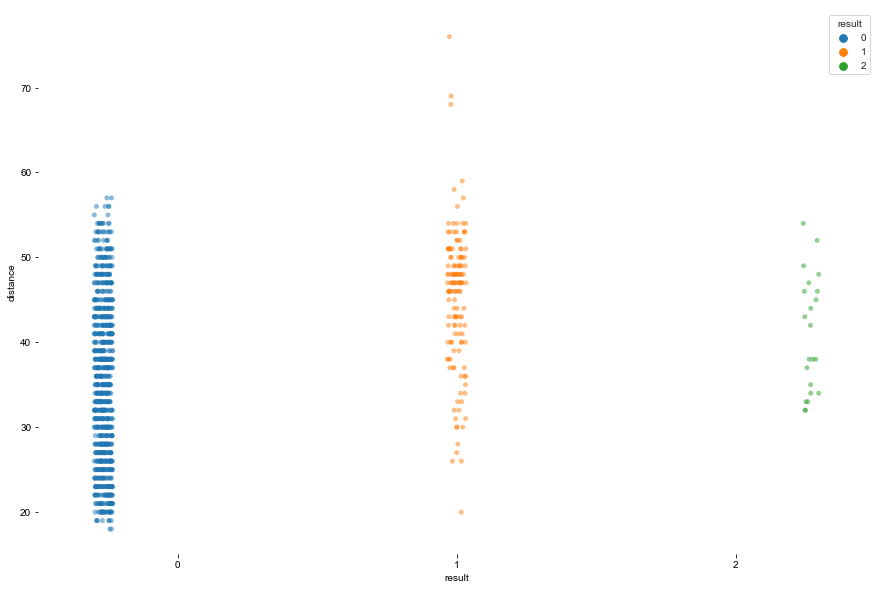

In [14]:
plot_size = (15,10)
f, ax = plt.subplots(figsize = plot_size)
sns.set_style("whitegrid")
sns.despine(bottom=True, left=True)
sns.stripplot(x="result", y="distance", hue="result",
              data=df, dodge=True, jitter=True,
              alpha=.5, zorder=1)
plt.show()

In [15]:
print(df.result.value_counts())

0    878
1    139
2     22
Name: result, dtype: int64


In [16]:
print(df.columns.values)

['GameDate' 'AwayTeam' 'HomeTeam' 'qtr' 'min' 'sec' 'kickteam' 'def'
 'down' 'togo' 'kicker' 'ydline' 'name' 'distance' 'homekick' 'kickdiff'
 'timerem' 'offscore' 'defscore' 'GOOD' 'Missed' 'Blocked' 'timeremhalf'
 'overtime' 'twominutewarning' 'fourth_qtr' 'year' 'month' 'day'
 'close_score' 'score_can_change' 'result']


## Build the Logistic Regression Model

In [17]:
X = df[['distance','homekick','close_score','score_can_change','fourth_qtr','overtime','twominutewarning']]
X.close_score = X.close_score + 0.
X.score_can_change = X.score_can_change + 0.
X.fourth_qtr = X.fourth_qtr + 0.
X.overtime = X.overtime + 0.
X.twominutewarning = X.twominutewarning + 0.

X.describe()

C:\Users\Mike\Documents\Programming\Python\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,distance,homekick,close_score,score_can_change,fourth_qtr,overtime,twominutewarning
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,36.666025,0.494706,0.707411,0.335900,0.245428,0.012512,0.211742
std,9.847836,0.500213,0.455170,0.472532,0.430548,0.111209,0.408740
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,76.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
y = df[['GOOD','Missed','Blocked','result']]
y.describe()

,GOOD,Missed,Blocked,result
count,1039.000000,1039.000000,1039.000000,1039.000000
mean,0.845043,0.133782,0.021174,0.176131
std,0.362038,0.340582,0.144034,0.433172
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,2.000000


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [20]:
print(X_train.shape)
print(y_train.shape)

(779, 7)
(779, 4)


In [21]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver = 'lbfgs', max_iter=1000)
logistic.fit(X_train,y_train.GOOD.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## Logistic Regression Results

In [22]:
print( 'test score: %.3f' %logistic.score(X_test,y_test.GOOD.values.ravel()))

print( 'train score: %.3f' %logistic.score(X_train,y_train.GOOD.values.ravel()))

test score: 0.858
train score: 0.837


In [23]:
pd.DataFrame(
    {"attribute" : X.columns.values,
     "coefficient" : logistic.coef_[0]}
)

,attribute,coefficient
0,distance,-0.109757
1,homekick,-0.422059
2,close_score,-0.378232
3,score_can_change,-0.035352
4,fourth_qtr,0.198571
5,overtime,0.318624
6,twominutewarning,0.125338


In [24]:
print( 'Percent of good field goals in test set: %.3f' % y_test.GOOD.mean())

Percent of good field goals in test set: 0.854


In [25]:
test_results = pd.DataFrame(logistic.predict_proba(X_test)).rename({0: 'prob_no_good',1: 'prob_good'},axis = "columns").join(y_test.reset_index().drop(columns = 'index')).join(X_test.reset_index().drop(columns = 'index'))
test_results.result = test_results.result.map({0:"good",1:"miss",2:"block"})
test_results.sort_values('prob_good')

,prob_no_good,prob_good,GOOD,Missed,Blocked,result,distance,homekick,close_score,score_can_change,fourth_qtr,overtime,twominutewarning
162,0.892725,0.107275,0,1,0,miss,76,1,0.0,0.0,0.0,0.0,1.0
199,0.563111,0.436889,1,0,0,good,57,1,1.0,1.0,0.0,1.0,0.0
118,0.552107,0.447893,0,1,0,miss,59,0,1.0,0.0,0.0,0.0,1.0
200,0.497418,0.502582,1,0,0,good,57,0,1.0,0.0,0.0,0.0,1.0
210,0.424180,0.575820,0,1,0,miss,49,1,1.0,1.0,0.0,0.0,0.0
110,0.424180,0.575820,1,0,0,good,49,1,1.0,1.0,0.0,0.0,0.0
15,0.415907,0.584093,0,0,1,block,54,0,1.0,0.0,0.0,0.0,1.0
86,0.403730,0.596270,1,0,0,good,52,1,0.0,0.0,0.0,0.0,0.0
137,0.399984,0.600016,0,1,0,miss,53,1,0.0,0.0,0.0,0.0,1.0
214,0.394173,0.605827,1,0,0,good,50,1,1.0,0.0,1.0,0.0,0.0


## Other Logistic Regression Models from SciKit-Learn

In [26]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
OVR = OneVsRestClassifier(logistic).fit(X_train,y_train.result)
OVO = OneVsOneClassifier(logistic).fit(X_train,y_train.result)
print( 'One vs rest accuracy: %.3f' % OVR.score(X_test,y_test.result) )
print( 'One vs one accuracy: %.3f' % OVO.score(X_test, y_test.result) )

One vs rest accuracy: 0.858
One vs one accuracy: 0.854


In [27]:
from sklearn.linear_model import LogisticRegressionCV
logCV = LogisticRegressionCV(solver = 'lbfgs', max_iter=1000, cv = 5)
logCV.fit(X_train,y_train.GOOD.values.ravel())
print( 'Cross Validation test score: %.3f' % logCV.score(X_test,y_test.GOOD.values.ravel()))
print( 'Cross Validation train score: %.3f' % logCV.score(X_train,y_train.GOOD.values.ravel()))

Cross Validation test score: 0.862
Cross Validation train score: 0.845


## Logistic Regression with indicators of Kicker Skill

In [28]:
above_average = df.groupby("name")["GOOD"].agg([("kickerpercent", np.mean),("num_kicks","count")]).reset_index()

above_average = above_average.assign(
    above_average = (above_average.kickerpercent > df.GOOD.mean()) & (above_average.num_kicks < 16)
).drop(columns=['kickerpercent','num_kicks'])

above_average.above_average=above_average.above_average.astype("float")

In [29]:
new_df = df.merge(above_average)

In [30]:
X_skill = new_df[['distance','homekick','kickdiff','fourth_qtr','overtime','twominutewarning','above_average']]
y_skill = new_df[['GOOD','Missed','Blocked','result']]
X_train_skill, X_test_skill, y_train_skill, y_test_skill = train_test_split(X_skill, y_skill, test_size = 0.25, random_state = 10)
logistic2 = LogisticRegression(solver = 'lbfgs', max_iter=1000)
logistic2.fit(X_train_skill, y_train_skill.GOOD.ravel())

print( 'test score: %.3f' % logistic2.score(X_test_skill,y_test_skill.GOOD.values.ravel()))
print( 'train score: %.3f' % logistic2.score(X_train_skill,y_train_skill.GOOD.values.ravel()))

test score: 0.838
train score: 0.850


In [31]:
pd.DataFrame(
    {"attribute" : X_skill.columns.values,
     "coefficient" : logistic2.coef_[0]}
)

,attribute,coefficient
0,distance,-0.107204
1,homekick,-0.258668
2,kickdiff,-0.000018
3,fourth_qtr,-0.008767
4,overtime,0.420031
5,twominutewarning,-0.184463
6,above_average,0.649266


In [32]:
OVR2 = OneVsRestClassifier(logistic2).fit(X_train_skill, y_train_skill.result)
OVO2 = OneVsOneClassifier(logistic2).fit(X_train_skill, y_train_skill.result)
print( 'One vs rest accuracy: %.3f' % OVR2.score(X_test_skill, y_test_skill.result) )
print( 'One vs one accuracy: %.3f' % OVO2.score(X_test_skill, y_test_skill.result) )

One vs rest accuracy: 0.838
One vs one accuracy: 0.838


## Neural Net Models

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\Mike\Documents\Programming\Python\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mike\Documents\Programming\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mike\Documents\Programming\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [35]:
nn = MLPClassifier(hidden_layer_sizes=(12,12), max_iter= 10000)
nn.fit(X_train_scaled, y_train.result)
nn_predicted = nn.predict(X_test_scaled)

In [36]:
from sklearn.metrics import accuracy_score
print(accuracy_score(nn_predicted, y_test.result))
print(accuracy_score(nn.predict(X_train_scaled),y_train.result))

0.85
0.8639281129653402


In [37]:
pd.DataFrame(
    {"prediction" : nn_predicted,
     "actual" : y_test.result}
).assign(test = 1).groupby(by = ['actual','prediction']).count()

test
actual prediction      
0      0            215
       1              7
1      0             27
       1              6
2      0              5

In [38]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import Accuracy, CategoricalAccuracy, BinaryAccuracy

print(tf.VERSION)
print(tf.keras.__version__)

1.13.1
2.2.4-tf


In [39]:
model = tf.keras.Sequential()
model.add(layers.Dense(12, activation='sigmoid',input_shape = [X_train_scaled.shape[1]]))
model.add(layers.Dropout(rate = 0.25))
model.add(layers.Dense(12, activation='sigmoid'))
model.add(layers.Dropout(rate = 0.25))
model.add(layers.Dense(3, activation='softmax'))

optimizer = tf.keras.optimizers.Adam()

model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy', 'categorical_accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                96        
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 39        
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [41]:
class PrintDot(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  X_train_scaled, y_train.drop(columns='result'),
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................

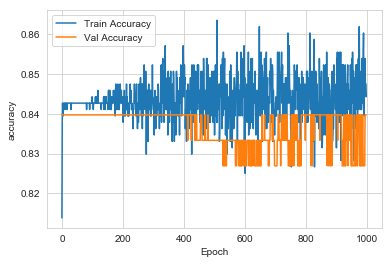

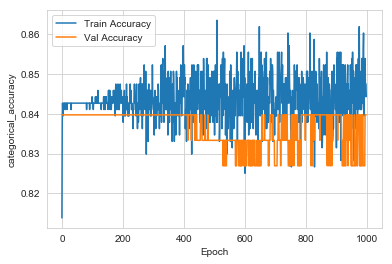

In [42]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.plot(hist['epoch'], hist['acc'],
           label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Val Accuracy')
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('categorical_accuracy')
  plt.plot(hist['epoch'], hist['categorical_accuracy'],
           label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_categorical_accuracy'],
           label = 'Val Accuracy')
  plt.legend()
  plt.show()


plot_history(history)

In [43]:
model.evaluate(X_test_scaled, y_test.drop(columns = 'result'))

260/260 [==============================] - 0s 60us/sample - loss: 0.4155 - acc: 0.8538 - categorical_accuracy: 0.8538


[0.415505850315094, 0.85384613, 0.85384613]

In [44]:
test_results_nn = pd.DataFrame({"predicted_result":model.predict_classes(X_test_scaled)}).join(pd.DataFrame(model.predict(X_test_scaled)).rename({0: 'prob_good',1: 'prob_miss',2:'prob_block'},axis = "columns")).join(y_test.reset_index().drop(columns = 'index')).join(X_test.reset_index().drop(columns = 'index'))
test_results_nn.result = test_results_nn.result.map({0:"good",1:"miss",2:"block"})
test_results_nn.predicted_result = test_results_nn.predicted_result.map({0:"good",1:"miss",2:"block"})

In [45]:
test_results_nn.sort_values('prob_good')

,predicted_result,prob_good,prob_miss,prob_block,GOOD,Missed,Blocked,result,distance,homekick,close_score,score_can_change,fourth_qtr,overtime,twominutewarning
162,miss,0.424284,0.559634,0.016082,0,1,0,miss,76,1,0.0,0.0,0.0,0.0,1.0
199,miss,0.436556,0.547472,0.015972,1,0,0,good,57,1,1.0,1.0,0.0,1.0,0.0
214,good,0.497076,0.484496,0.018429,1,0,0,good,50,1,1.0,0.0,1.0,0.0,0.0
110,good,0.511188,0.468616,0.020196,1,0,0,good,49,1,1.0,1.0,0.0,0.0,0.0
210,good,0.511188,0.468616,0.020196,0,1,0,miss,49,1,1.0,1.0,0.0,0.0,0.0
184,good,0.519334,0.461403,0.019263,0,1,0,miss,49,1,1.0,0.0,1.0,0.0,0.0
77,good,0.546589,0.433148,0.020263,0,1,0,miss,48,1,1.0,0.0,1.0,0.0,0.0
118,good,0.548352,0.430221,0.021427,0,1,0,miss,59,0,1.0,0.0,0.0,0.0,1.0
99,good,0.560817,0.416582,0.022601,0,1,0,miss,47,1,1.0,1.0,0.0,0.0,0.0
16,good,0.565768,0.411017,0.023214,1,0,0,good,48,1,1.0,0.0,0.0,0.0,0.0
